Nama  : Muhammad Hallaj Nashrulloh

---

NIM   : 2206031

---
Mata Kuliah : Pengolahan Citra Digital


Jawaban Soal 1 :
1. Empat jenis tepi yang biasanya ditemukan dalam citra digital :
    - Tepi Curam (Step Edge) :
        Terjadi perubahan intensitas yang signifikan dan tiba-tiba antara dua area dalam citra. jenis tepi ini sering ditemukan di batas tegas antara dua objek, seperti batas antara langit dan gedung.
    - Tepi Landai (Ramp Edge) :
        Perubahan intensitasnya lebih bertahap dibandingkan tepi curam. biasanya, jenis ini terjadi karena pencahayaan yang merata atau objek yang biasanya bergradasi, seperti bayangan yang memudar.
    - Tepi Garis (Line Edge) :
        Merupakan batas tipis yang memisahkan area terang dan gelap, seperti kabel listrik yang tergambar dalam latar langit.
    - Tepi Atap (Roof Edge) :
        Perubahan intensitas berbentuk puncak. jenis ini menyerupai kurva seperti atap rumah, sering muncul pada objek dengan tekstur yang unik.

2. contoh tepi dalam kehidupan sehari-hari :
    - Tepi Curam : Batas pintu terhadap dinding yang dicat berbeda warna.
    - Tepi Landai : Gradasi warna dalam lukisan dinding.
    - Tepi Garis : kabel listrik di depan langit terang.
    - Tepi Atap : Refleksi lampu pada permukaan kaca yang melengkung.

3. Tepi dengan derau : Derau dapat menciptakan tepi palsu yang sulit dibedakan dari tepi sebenarnya, sehingga untuk menangani ini, pelembutan citra (misalnya dengan Gaussian Filter) dilakukan sebelum pendeteksian. Hal ini membantu menghilangkan gangguan kecil sehingga tepi yang lebih signifikan dapat terdeteksi dengan lebih akurat.



.

 .

Jawaban Soal 2 :

1. Operator yang dipilih yaitu operator Sobel karena mampu mendeteksi tepi dalam arah horizontal dan vertikal, sehingga menghasilkan hasil yang baik dengan efisiensi komputasi yang relatif ringan.

Silakan unggah file gambar...


Saving IMG_20221213_200525.jpg to IMG_20221213_200525 (1).jpg


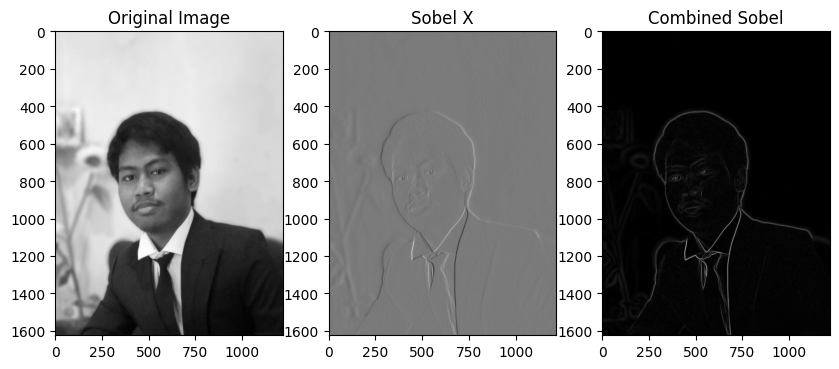

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Membaca citra dalam grayscale
print("Silakan unggah file gambar...")
uploaded = files.upload()

if uploaded:
    file_name = list(uploaded.keys())[0]

    # 2. Baca gambar dalam mode grayscale
    img = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Gambar tidak valid. Pastikan file yang diunggah berupa gambar.")
    else:
      # Operator Sobel untuk arah X dan Y
      sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
      sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

      # Kombinasi magnitudo
      sobel_combined = np.sqrt(sobelx**2 + sobely**2)

      # Menampilkan hasil
      plt.figure(figsize=(10, 5))
      plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
      plt.subplot(1, 3, 2), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
      plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
      plt.show()



Langkah - langkah Implementasi :
- Baca citra dalam format grayscale.
- Terapkan filter Sobel untuk arah horizontal dan vertikal, Hitung gradien untuk arah X dan Y menggunakan kernel Sobel.
- Gabungkan hasil menggunakan magnitude gradien untuk mendapatkan tepi keseluruhan.
- Tampilkan citra hasil deteksi tepi menggunakan library Matplotlib.

.

.

Jawaban Soal 3 :
1. Perbandingan operator Sobel, Prewitt, Canny :
  - Sobel : Akurasi cukup baik (khususnya pada citra dengan kontras yang tinggi), Kompleksitas rendah (cocok untuk kebutuhan umum.
  - Prewitt : Akurasi lebih rendah dibandingkan sobel karena bobot kernel lebih kecil, kompleksitas sama dengan sobel (lebih sederhana).
  - Canny : Akurasi tinggi (menghasilkan tepi yang halus dan tegas) dengan ketebalan tepi konsisten, tetapi lebih kompleks secara komputasi (karena melibatkan beberapa langkah seperti non-maximum suppression dan double thresholding).

2. Situasi Penggunaan Canny : Operator Canny direkomendasikan untuk citra dengan detail yang kompleks atau jika diperlukan pendeteksian tepi dengan presisi tinggi, misalnya untuk aplikasi medis atau pengenalan objek.

.

.

Jawaban Soal 4 :
1. Langkah-langkah :
  - Mengurangi derau : Terapkan Gaussian filter untuk menghaluskan citra.
  - Deteksi tepi : Gunakan Sobel dan Canny pada citra yang sudah difilter.

2. Kode Implementasi :


Silakan unggah file gambar...


Saving IMG_20221213_200525.jpg to IMG_20221213_200525 (5).jpg


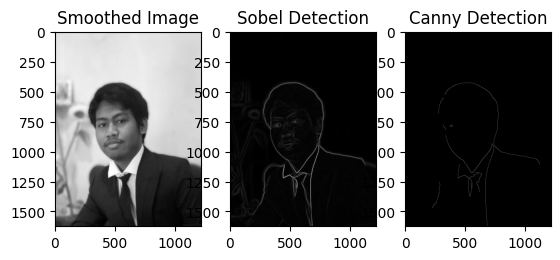

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Membaca citra dalam grayscale
print("Silakan unggah file gambar...")
uploaded = files.upload()

if uploaded:
    file_name = list(uploaded.keys())[0]

    # 2. Baca gambar dalam mode grayscale
    img = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Gambar tidak valid. Pastikan file yang diunggah berupa gambar.")
    else:
      # Gaussian filter dan deteksi tepi pada citra noisy
      smoothed_img = cv2.GaussianBlur(img, (5, 5), 1)

      # Sobel
      sobelx = cv2.Sobel(smoothed_img, cv2.CV_64F, 1, 0, ksize=3)
      sobely = cv2.Sobel(smoothed_img, cv2.CV_64F, 0, 1, ksize=3)
      sobel_combined = np.sqrt(sobelx**2 + sobely**2)

      # Canny
      canny_edges = cv2.Canny(smoothed_img, 100, 200)

      plt.subplot(1, 3, 1), plt.imshow(smoothed_img, cmap='gray'), plt.title('Smoothed Image')
      plt.subplot(1, 3, 2), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Detection')
      plt.subplot(1, 3, 3), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Detection')
      plt.show()

3. Analisis hasil :
  - Sobel menunjukkan tepi lebih kasar, terutama pada area yang masih terpengaruh derau.
  - Canny memberikan hasil yang lebih halus karena melibatkan langkah seperti suppression dan threshlod ganda.